In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('gld_price_data.csv')

In [26]:
df.head()

,SPX,GLD,USO,SLV,EUR/USD,Year,Month,Day
0,1447.160034,84.860001,72.998754,15.180,1.471692,2008,1,2
1,1447.160034,85.570000,72.998754,15.285,1.474491,2008,1,3
2,1411.630005,85.129997,72.998754,15.167,1.475492,2008,1,4
3,1416.180054,84.769997,72.998754,15.053,1.468299,2008,1,7
4,1390.189941,86.779999,72.998754,15.590,1.557099,2008,1,8


In [5]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
df['Date']=pd.to_datetime(df['Date'])

In [10]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

In [11]:
df.head(2)

,Date,SPX,GLD,USO,SLV,EUR/USD,Year,Month,Day
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692,2008,1,2
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491,2008,1,3


In [13]:
df.drop('Date',axis=1,inplace=True)

In [14]:
df.shape

(2290, 8)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
 5   Year     2290 non-null   int32  
 6   Month    2290 non-null   int32  
 7   Day      2290 non-null   int32  
dtypes: float64(5), int32(3)
memory usage: 116.4 KB


In [17]:
num_col=df.select_dtypes('float64')
num_col.head(2)

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491


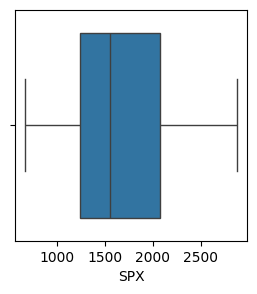

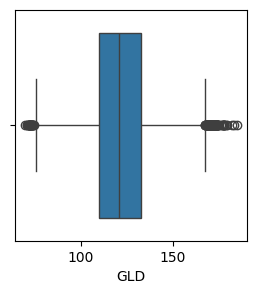

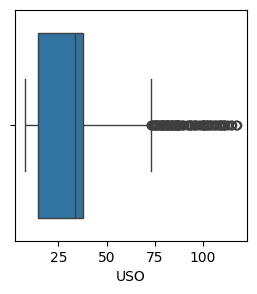

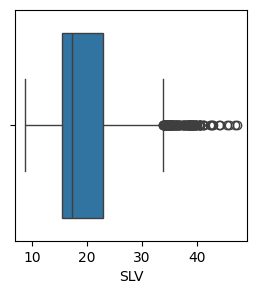

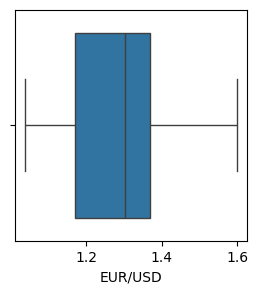

In [20]:
for col in num_col:
  plt.figure(figsize=(3,3))
  sns.boxplot(x=df[col])
  plt.show()

In [21]:
for col in num_col:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1

  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR

  def outliers(value):
    if value < lower_bound:
      return lower_bound
    elif value > upper_bound:
      return upper_bound
    else:
      return value
    
  df[col]=df[col].apply(outliers)

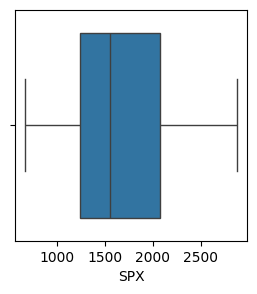

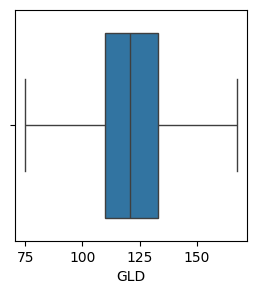

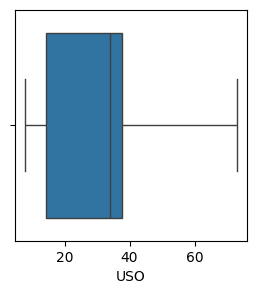

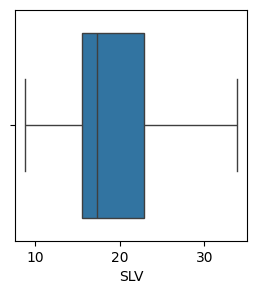

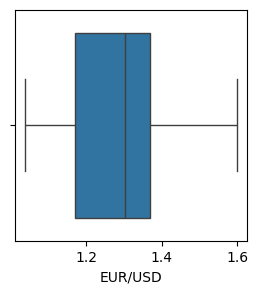

In [22]:
for col in num_col:
  plt.figure(figsize=(3,3))
  sns.boxplot(x=df[col])
  plt.show()

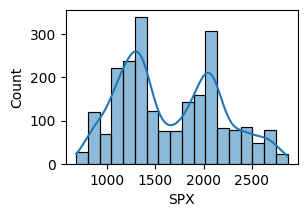

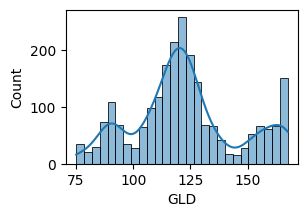

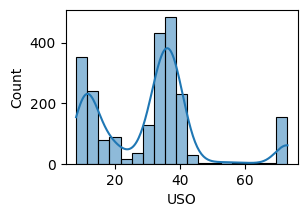

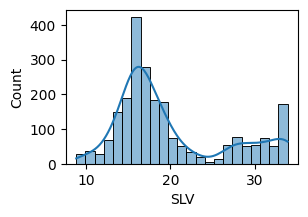

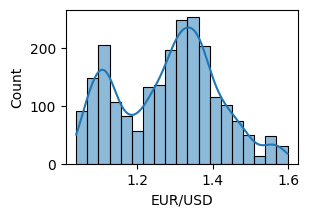

In [24]:
for col in num_col:
  plt.figure(figsize=(3,2))
  sns.histplot(df[col],kde=True)
  plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [31]:
x=df.drop('SPX',axis=1)
y=df['SPX']

In [32]:
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
print(X_TRAIN.shape,X_TEST.shape,Y_TRAIN.shape,Y_TEST.shape)

(1832, 7) (458, 7) (1832,) (458,)


In [34]:
models={
  'Linear Regression': LinearRegression(),
  'RandomForest Regressor' : RandomForestRegressor(),
  'XGB Regressor': XGBRegressor()
}

In [35]:
for model_name, model in models.items():
  model.fit(X_TRAIN,Y_TRAIN)
  y_pred = model.predict(X_TEST)

  mse=mean_squared_error(Y_TEST,y_pred)
  r2=r2_score(Y_TEST,y_pred)

  print(f"{model_name}:")
  print(f" MSE: {mse:.4f}")
  print(f"R2:{r2:.4f}")
  print()

Linear Regression:
 MSE: 7129.8826
R2:0.9735

RandomForest Regressor:
 MSE: 376.8113
R2:0.9986

XGB Regressor:
 MSE: 415.0618
R2:0.9985

